## 使うライブラリをインポートして，乱数のseedを固定

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


seed  = 11
np.random.seed(seed)

### まず，フィッティングしたいデータセット$\boldsymbol{D}$を生成

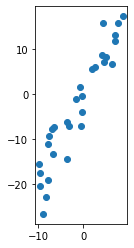

In [2]:
N = 30
x1 =  20 * (np.random.rand(N)) - 10
# y = a_1 * x + a_0 + gaussian noize
#x2 =  0.5 * x1 + 5 + np.random.normal(x1, 10, N)
x2 = np.sin(x1) + x1 + np.random.normal(x1, 5, N)

# 2次元 * N個の観測データ
D = np.squeeze(np.dstack([x1,x2]))

plt.scatter(x1,x2)
plt.gca().set_aspect('equal')
plt.show()

## モデルのパラメータ$\boldsymbol{a}$を推定する準備（変数をおく）

In [3]:
# x(shape: (2, N), (1,x_i)を並べた行列)
ones = np.ones(N)
X = np.squeeze(np.dstack([ones, x1]))


# y（shape: (N,1)）
y = x2[:,np.newaxis]
print(y.shape)


(30, 1)


## モデルのパラメータ$\boldsymbol{a}$を推定する

In [4]:
# @は内積の演算子， np.linalg.invは逆行列を計算してくれるライブラリ
a = (np.linalg.inv(X.T @ X) @ X.T) @ y
print(a.shape)
print(a)

(2, 1)
[[-0.39537169]
 [ 1.93065404]]


## 推定したモデル$\hat{y}$を描画する

In [5]:
# (1, x_i)が縦に並ぶ行列Xnewをつくる
Nnew = 1000
x= np.linspace(start = -10, stop = 10, num = Nnew)
ones = np.ones(Nnew)
Xnew = np.squeeze(np.dstack([ones,x]))
print(Xnew.shape)

Yhat = Xnew @ a
print(Yhat.shape)

(1000, 2)
(1000, 1)


## 観測データの分布上に学習したモデルをプロットする

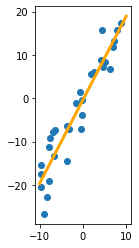

In [6]:
plt.scatter(x1,x2)
plt.plot(x,Yhat, linewidth=3,color='orange')
plt.gca().set_aspect('equal')
plt.show()